<a href="https://colab.research.google.com/github/gjsin1105/DAP__/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2000년부터 2021년까지 선수들의 수입 비교

* 수입(Earnings)의 기본 단위는 백만달러(million of $)이다.
* 13종류의 스포츠가 있으며 각 스포츠별로 속한 선수의 수가 천차만별일 수도 있다.
* 2001년도 선수들의 수입정보는 없다.
* 참고자료:

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

선수들의 정보를 저장한 데이터를 가져온다.

In [2]:
df = pd.read_csv('athlete/athletesv.csv')
df

,Name,Earnings,Year,Sport
0,Conor McGregor,180.0,2021,Mixed Martial Arts
1,Lionel Messi,130.0,2021,Soccer
2,Cristiano Ronaldo,120.0,2021,Soccer
3,Dak Prescott,107.5,2021,Football
4,LeBron James,96.5,2021,Basketball
...,...,...,...,...
1280,Martina Hingis,11.0,2000,Tennis
1281,Anna Kournikova,10.0,2000,Tennis
1282,Venus Williams,10.0,2000,Tennis
1283,Serena Williams,7.5,2000,Tennis


##The number of athletes in each sport
각 스포츠별로 해당 스포츠에 속하는 선수의 수가 어느정도인지 알아본다.

In [3]:
df["Sport"].value_counts()

Basketball            337
Football              226
Baseball              226
Soccer                144
Tennis                 98
Racing                 93
Golf                   85
Boxing                 50
Cricket                10
Track                   7
Mixed Martial Arts      4
Cycling                 3
MMA                     2
Name: Sport, dtype: int64

##Total earnings for each sport
스포츠 종류별로 해당 스포츠에 속한 선수들의 수입을 합하고 각 스포츠별로 어느 정도의 수입을 기록했는지 나타낸다.




In [4]:
sport_total = df.groupby('Sport')['Earnings'].sum().sort_values()
sport_total

Sport
MMA                      56.0
Cycling                  68.2
Track                   186.4
Cricket                 256.6
Mixed Martial Arts      374.0
Boxing                 2523.4
Tennis                 2958.7
Racing                 3014.6
Golf                   3459.4
Baseball               5339.1
Soccer                 5382.5
Football               6909.9
Basketball            10504.8
Name: Earnings, dtype: float64

##Average earnings of the athletes
각 스포츠가 기록한 총 수입을 가지고 스포츠별로 선수들의 평균 수입이 어느정도인지 비교한다.

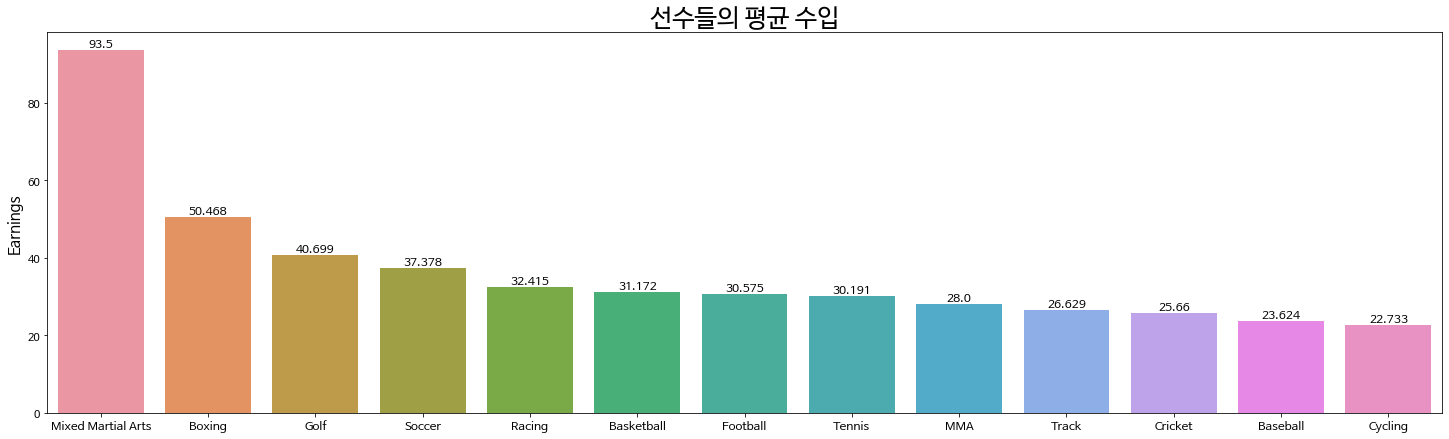

In [8]:
plt.figure(figsize=(25, 7))
plt.title("선수들의 평균 수입", size=25)
plt.xticks(fontsize=12)
plt.ylabel('Earnings', size=15)
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
avgtotal = df.groupby('Sport')['Earnings'].mean().round(3).sort_values(ascending=False)
for i, v in enumerate(x):
    plt.text(v, avgtotal[i], avgtotal[i],
             fontsize=12, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
sport_kind = [sport for sport in avgtotal.index]
sns.barplot(x=sport_kind, y=avgtotal)
plt.grid(False)
plt.show()

##The earnings of the top 5 athletes
2000년부터 2021년까지의 선수들 개인의 총 수입을 구한다.

In [6]:
athlete_total = df.groupby('Name')['Earnings'].sum().sort_values()
athlete_total

Name
Jennifer Capriati       6.0
Danica Patrick          7.0
Lorena Ochoa           10.0
Ana Ivanovic           10.0
Lindsay Davenport      12.0
                      ...  
Lionel Messi          911.5
Roger Federer         933.1
Cristiano Ronaldo     942.9
Floyd Mayweather      944.5
Tiger Woods          1523.5
Name: Earnings, Length: 429, dtype: float64

위에서 구한 선수들 개인의 총 수입을 가지고 상위 5명의 정보를 나타낸다.

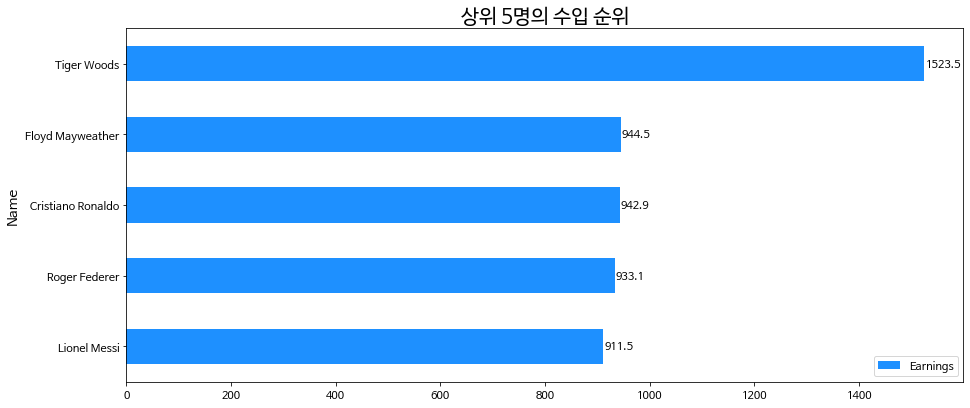

In [12]:
top = pd.DataFrame(athlete_total)
topincome = top.iloc[len(athlete_total)-5:len(athlete_total)+1]
plt.rc('font', size=11)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=14)
ax = topincome.plot(kind='barh', figsize=(15, 6.5), title='상위 5명의 수입 순위', color='dodgerblue', grid=False)
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.002, y+height/2, "%.1f"%(width), va='center')

## The highest earnings information for each sport
2000년부터 2021년의 기간중에 각 스포츠별로 수입이 가장 높은 연도와 선수 정보를 나타낸다.

In [88]:
df.loc[df.reset_index().groupby('Sport')['Earnings'].idxmax()]

,Name,Earnings,Year,Sport
167,Mike Trout,50.6,2019,Baseball
4,LeBron James,96.5,2021,Basketball
550,Floyd Mayweather,300.0,2015,Boxing
765,Mahendra Singh Dhoni,31.5,2013,Cricket
1142,Lance Armstrong,28.0,2005,Cycling
3,Dak Prescott,107.5,2021,Football
1068,Tiger Woods,115.0,2008,Golf
373,Conor McGregor,34.0,2017,MMA
0,Conor McGregor,180.0,2021,Mixed Martial Arts
7,Lewis Hamilton,82.0,2021,Racing


##Changes in the athlete's earnings over a specific period of time
자신이 궁금해하는 선수의 특정 기간 동안의 수입 변화를 나타낸다.

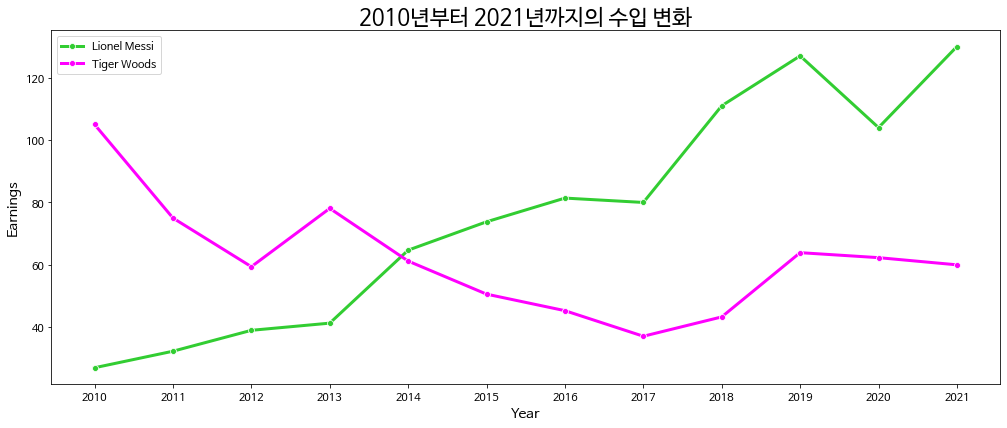

In [13]:
df12 = df.iloc[:1050]
df1 = df12.loc[:, ['Name', 'Earnings', 'Year']]
df2 = df1.loc[df1['Name']=='Lionel Messi']
df3 = df1.loc[df1['Name']=='Tiger Woods']
fig = plt.figure(figsize=(17,6.5))
plt.title('2010년부터 2021년까지의 수입 변화',fontsize=22)
plt.xlabel('Year')
plt.ylabel('Earnings')
sns.lineplot(x=df2['Year'], y=df2['Earnings'], label='Lionel Messi', linewidth=3, color='limegreen', marker="o")
sns.lineplot(x=df3['Year'], y=df3['Earnings'], label='Tiger Woods', linewidth=3, color='magenta', marker="o")
plt.xticks(np.arange(2010, 2022), ('2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'))
plt.show()

##Information about the players with the highest earnings each year
기존의 dataframe에서 연도별로 가장 많은 수입을 기록한 선수들의 정보를 가져와서 새로운 dataframe을 만든다.

In [90]:
data2000 = df[df['Year']==2000][:1]
data2002 = df[df['Year']==2002][:1]
data2003 = df[df['Year']==2003][:1]
data2004 = df[df['Year']==2004][:1]
data2005 = df[df['Year']==2005][:1]
data2006 = df[df['Year']==2006][:1]
data2007 = df[df['Year']==2007][:1]
data2008 = df[df['Year']==2008][:1]
data2009 = df[df['Year']==2009][:1]
data2010 = df[df['Year']==2010][:1]
data2011 = df[df['Year']==2011][:1]
data2012 = df[df['Year']==2012][:1]
data2013 = df[df['Year']==2013][:1]
data2014 = df[df['Year']==2014][:1]
data2015 = df[df['Year']==2015][:1]
data2016 = df[df['Year']==2016][:1]
data2017 = df[df['Year']==2017][:1]
data2018 = df[df['Year']==2018][:1]
data2019 = df[df['Year']==2019][:1]
data2020 = df[df['Year']==2020][:1]
data2021 = df[df['Year']==2021][:1]
top_year = pd.concat([data2000, data2002, data2003, data2004, data2005, data2006, data2007, data2008, data2009, data2010, data2011, data2012, data2013, data2014, data2015, data2016, data2017, data2018, data2019, data2020, data2021])
top_year

,Name,Earnings,Year,Sport
1259,Michael Schumacher,59.0,2000,Racing
1234,Tiger Woods,69.0,2002,Golf
1209,Tiger Woods,78.0,2003,Golf
1159,Tiger Woods,80.3,2004,Golf
1134,Tiger Woods,87.0,2005,Golf
1114,Tiger Woods,90.0,2006,Golf
1089,Tiger Woods,100.0,2007,Golf
1068,Tiger Woods,115.0,2008,Golf
1050,Tiger Woods,110.0,2009,Golf
1000,Tiger Woods,105.0,2010,Golf


연도별로 수입순위 1위에 대해서 차이가 어느 정도인지를 알아본다.

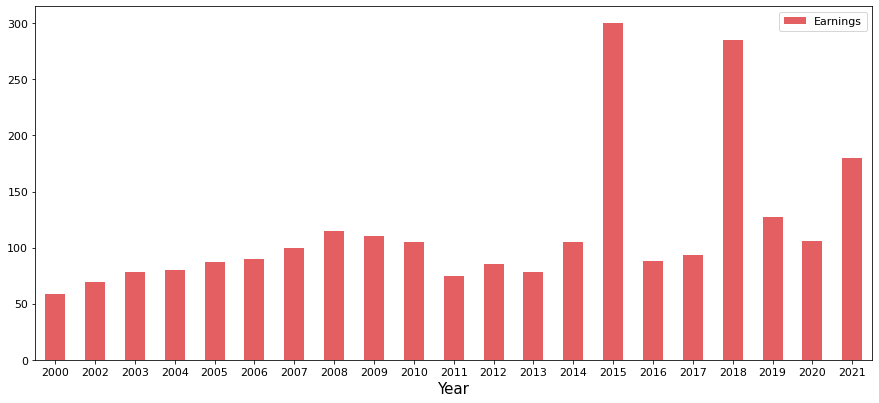

In [91]:
top_year.plot(kind='bar', figsize=(15, 6.5), x='Year', y='Earnings', color='#e35f62')
plt.xticks(rotation=0)
plt.show()

연도별로 가장 많은 수입을 기록한 선수의 스포츠 종류를 종합해보고 각 스포츠의 비율이 어떻게 되는지 나타낸다.

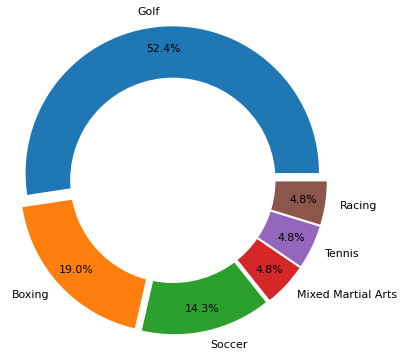

In [92]:
sportcount = top_year.value_counts('Sport')
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(sportcount, labels=['Golf','Boxing','Soccer','Mixed Martial Arts', 'Tennis', 'Racing'],
       autopct="%1.1f%%", pctdistance=0.85, explode=(0.05,0.05,0.05,0.05,0.05,0.05))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.show()